In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

In [2]:
import route_dynamics.route_elevation.base_df as base
import route_dynamics.route_energy.longi_dynam_model as ldm
from route_dynamics.route_riders import route_riders as ride
from route_dynamics.route_visualizer import visualizer as vis

/Users/ericaeggleton/opt/miniconda3/envs/route_dynamics/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (46) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
import matplotlib.pyplot as plt

In [4]:
shapefile_name = '../data/rt22_pts.shp'

a_prof = '../data/acceleration.csv'

In [5]:
rt_df = base.wrapper(shapefile_name)

In [ ]:
rt_df.iloc[1173]

In [6]:
df_22, riders_22, mass_22 = ride.route_ridership('PM', 'I', 22) 
stop_coord, rider_coord = ride.stop_coord(22, riders_22)
coords22 = rider_coord['coordinates'].values
mass22 = rider_coord['Mean'].values

In [7]:
ex22 = ldm.RouteTrajectory(
    22, 
    shapefile_name, 
    bus_speed_model='const_accel_between_stops_and_speed_lim',
    stop_coords=coords22,
    mass_array=mass22 + mass_22,
    a_prof = a_prof
)



/Users/ericaeggleton/opt/miniconda3/envs/route_dynamics/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
ex22.route_df

In [ ]:
plot_22 = vis.profile_x(ex22.raw_batt_power_exert, ex22.route_df.cum_distance, 22)
print("Energy required ={} J/m".format(ex22.energy_from_route()/(ex22.route_df.cum_distance.tail(1))))

In [ ]:
elev22 = vis.x_elev(ex22.raw_batt_power_exert, ex22.route_df.cum_distance, ex22.route_df.elevation, 22)

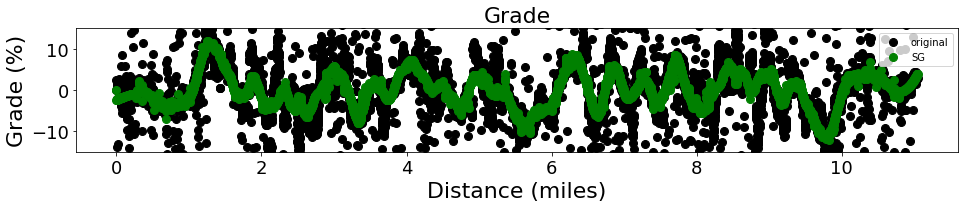

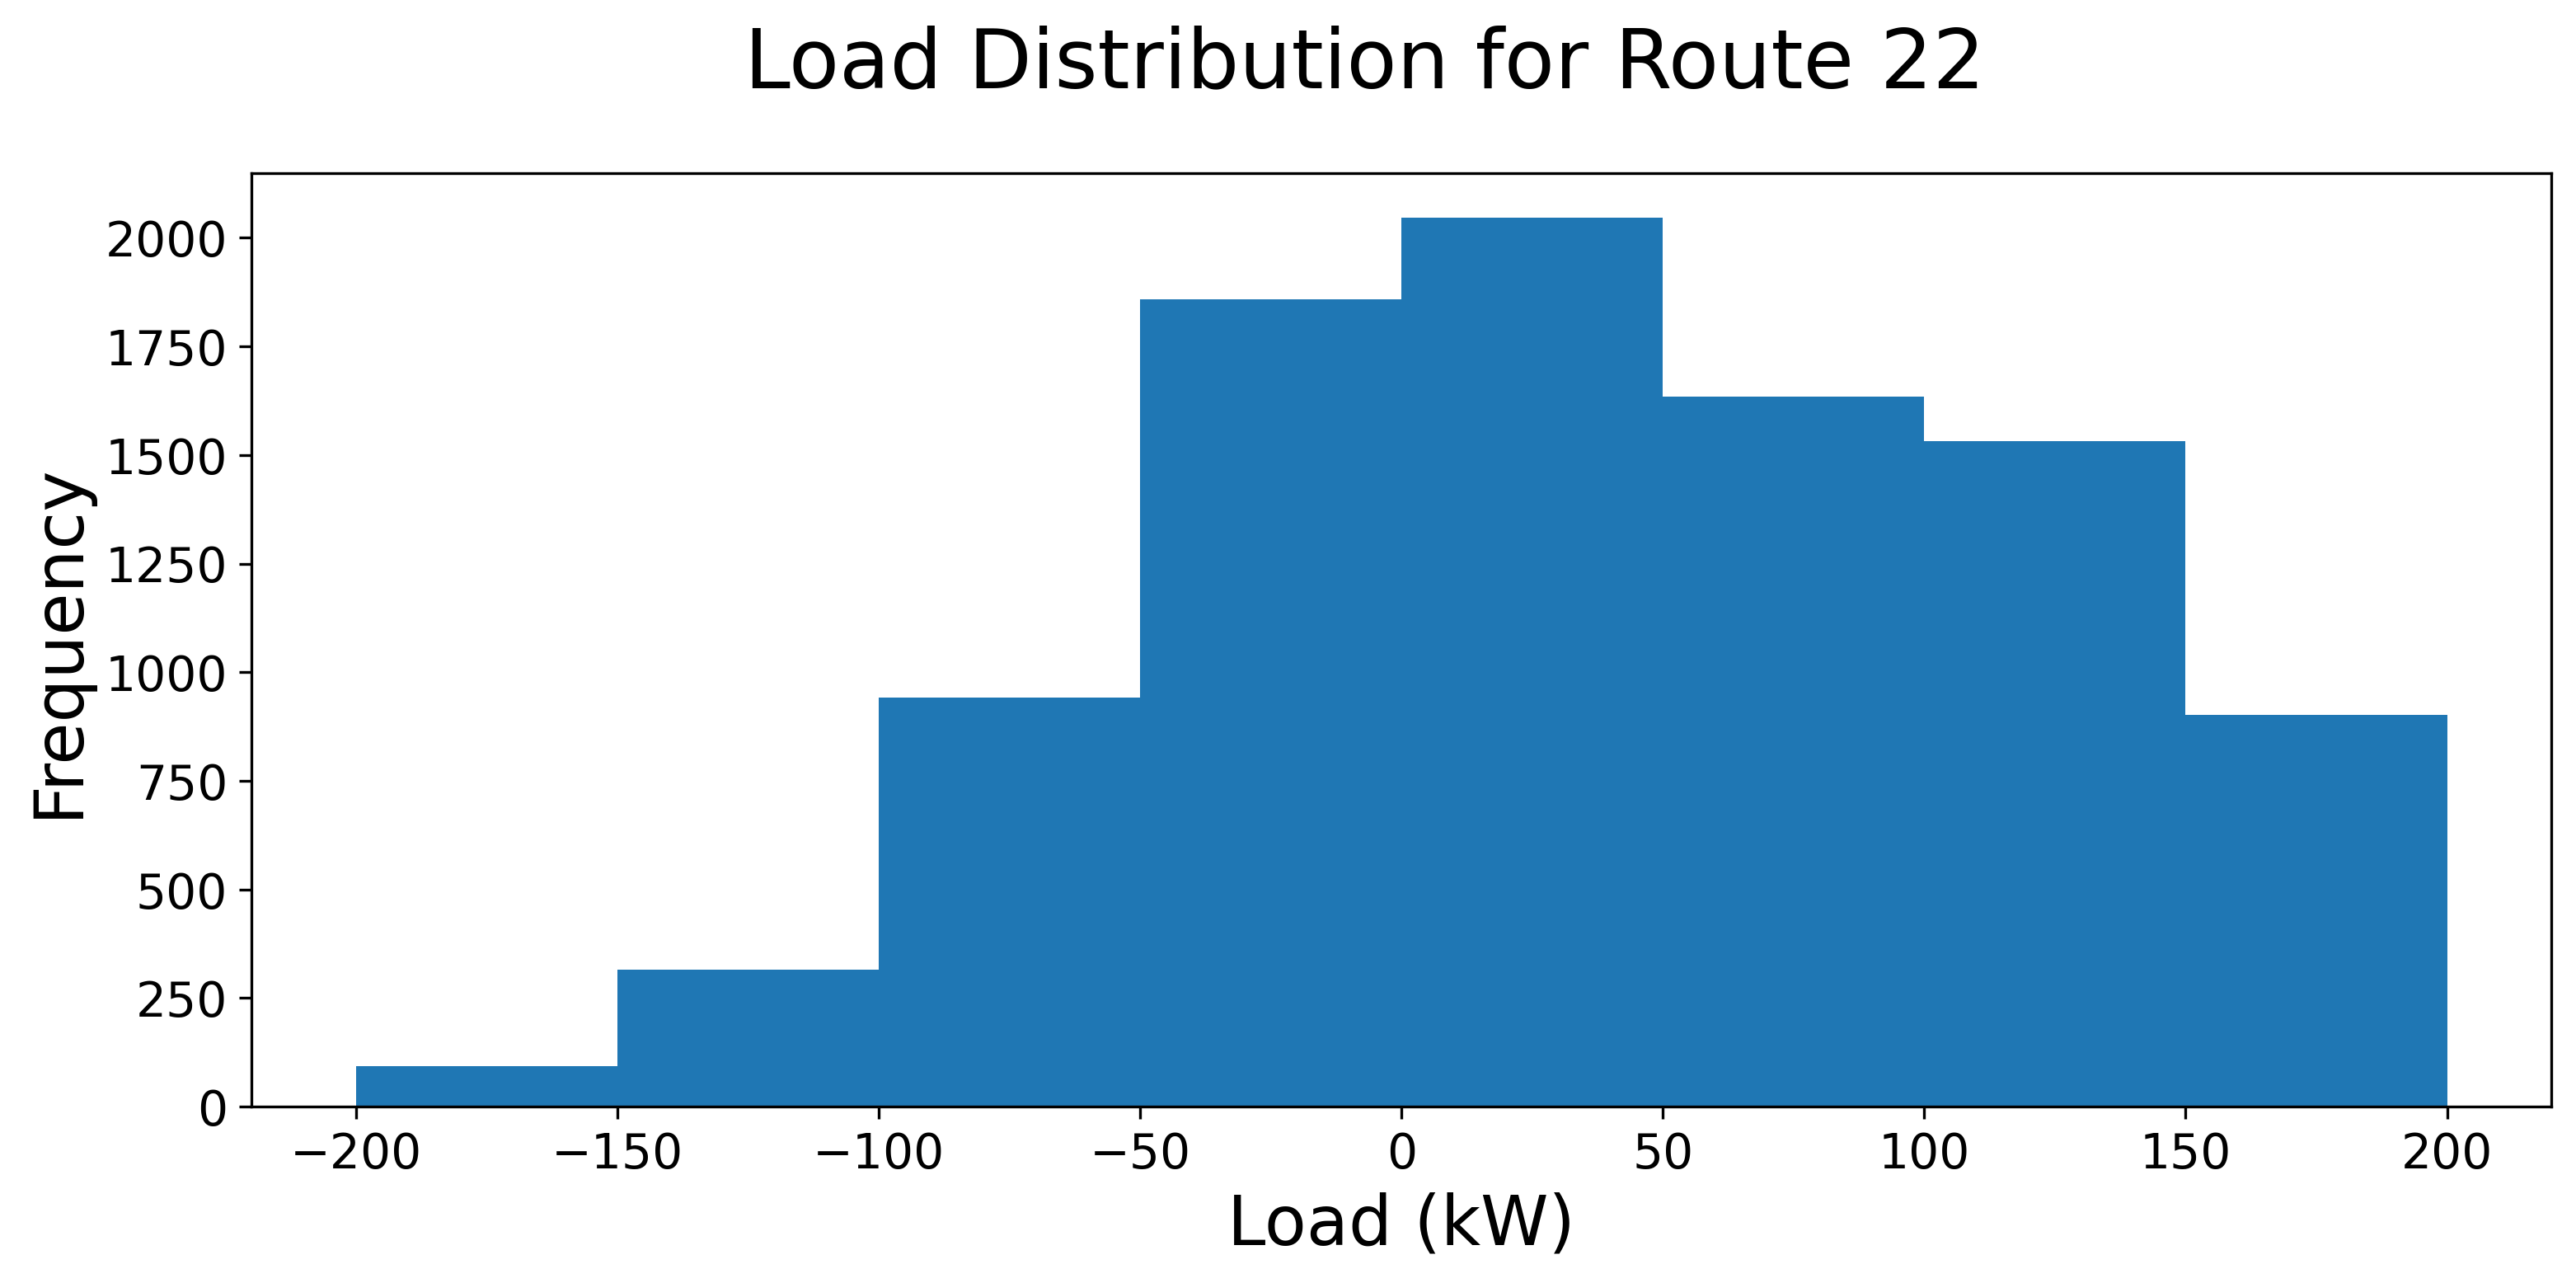

In [8]:
vis.hist(ex22.raw_batt_power_exert, ex22.route_df.cum_distance, 22)